<a href="https://colab.research.google.com/github/inefable12/ML_no_supervisado/blob/main/Kmeans_Auder_PZAder_Curcuminoides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://blog.paperspace.com/content/images/size/w1050/2021/01/Fig10-1.gif" width="300" alt="Python logo"  />

$$\Large \textit{Técnicas de Aprendizaje No Supervisado}$$

$$\large\textbf{PCA + K-means (Parte 2)}$$
$$\textit{Diferenciar 3 grupos de moléculas: Derivados de curcuminas,pirazinamida y ácido ursólico}$$

_Jesus Alvarado-Huayhuaz_
___

Importamos Pandas y Numpy

# EDA

In [3]:
import pandas as pd
import numpy as np

Empleamos pubchem para generar nuestra base de datos.

Generamos los 38 descriptores moleculares en Chemmine Tools (JoeLib)

In [4]:
df = pd.read_csv("0_clust_smi_pubchem.csv")

In [5]:
df

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,171647,138.149998,1.2309,11,3,1,0,0,0,0,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,181450,157.559997,1.6036,8,4,1,0,0,0,0,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,53393977,396.438991,8.6718,30,6,0,0,0,0,0,...,0,0,71.06,16.429361,1.082601,14.175829,25.262222,13.420118,260,248
296,51136451,356.373991,5.9132,26,6,2,2,0,0,0,...,0,0,93.06,11.376300,0.969437,10.734955,22.290809,9.972299,226,223
297,46946664,410.465990,8.5972,32,6,1,1,0,0,0,...,0,0,82.06,16.457952,0.969098,15.982759,26.253902,14.210000,276,272
298,46898924,425.412990,6.8134,28,8,1,2,1,0,0,...,0,0,122.19,15.917241,0.970202,15.406104,27.246094,14.302721,258,261


In [6]:
df.shape

(300, 39)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

In [17]:
df.drop(['cid'],inplace=True,axis=1)

In [18]:
df

,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,Fraction_of_rotatable_bonds,...,Number_of_NO2_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,123.114998,1.0732,9,4,1,0,0,0,0,0.111111,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,165.155998,1.5166,13,6,2,0,0,0,2,0.166667,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,265.053997,-1.7651,11,3,1,0,1,0,0,0.100000,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,138.149998,1.2309,11,3,1,0,0,0,0,0.100000,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,157.559997,1.6036,8,4,1,0,0,0,0,0.100000,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,396.438991,8.6718,30,6,0,0,0,0,0,0.333333,...,0,0,71.06,16.429361,1.082601,14.175829,25.262222,13.420118,260,248
296,356.373991,5.9132,26,6,2,2,0,0,0,0.222222,...,0,0,93.06,11.376300,0.969437,10.734955,22.290809,9.972299,226,223
297,410.465990,8.5972,32,6,1,1,0,0,0,0.354839,...,0,0,82.06,16.457952,0.969098,15.982759,26.253902,14.210000,276,272
298,425.412990,6.8134,28,8,1,2,1,0,0,0.343750,...,0,0,122.19,15.917241,0.970202,15.406104,27.246094,14.302721,258,261


In [19]:
for column in df:
  min = df[column].min()
  max = df[column].max()
  if max == min:
    del(df[column])
    continue

In [22]:
df.shape

(300, 34)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Molecular_weight               300 non-null    float64
 1   LogP                           300 non-null    float64
 2   Number_of_HBA_1                300 non-null    int64  
 3   Number_of_HBA_2                300 non-null    int64  
 4   Number_of_HBD_1                300 non-null    int64  
 5   Number_of_HBD_2                300 non-null    int64  
 6   Number_of_acidic_groups        300 non-null    int64  
 7   Number_of_aliphatic_OH_groups  300 non-null    int64  
 8   Number_of_basic_groups         300 non-null    int64  
 9   Fraction_of_rotatable_bonds    300 non-null    float64
 10  Number_of_heavy_bonds          300 non-null    int64  
 11  Number_of_heterocycles         300 non-null    int64  
 12  MolarRefractivity              300 non-null    flo

In [23]:
#Normalización

for column in df:
  if column != "Value":
    min = df[column].min()
    max = df[column].max()
    for i in range(len(df[column])):
      df[column][i] = (df[column][i]-min)/(max-min)

<ipython-input-23-b9375112e40f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][i] = (df[column][i]-min)/(max-min)


In [24]:
df

,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,Fraction_of_rotatable_bonds,...,Number_of_NO2_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,0.001257,0.067353,0,0,0,0,0,0,0,0.192593,...,0,0,0.314170,0.007595,0.928567,0.003714,0.000000,0.003008,0,0
1,0.054104,0.077875,0,0,0,0,0,0,1,0.288889,...,0,0,0.597417,0.075769,0.924870,0.029472,0.059687,0.068630,0,0
2,0.179681,0.000000,0,0,0,0,0,0,0,0.173333,...,0,0,0.247675,0.007542,0.148740,0.440096,0.078095,0.064811,0,0
3,0.020156,0.071095,0,0,0,0,0,0,0,0.173333,...,0,0,0.247675,0.008746,0.927646,0.004224,0.019858,0.009717,0,0
4,0.044556,0.079939,0,0,0,0,0,0,0,0.173333,...,0,0,0.314170,0.027211,0.928706,0.010987,0.019858,0.009717,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.344838,0.247667,0,0,0,0,0,0,0,0.577778,...,0,0,0.330332,0.307191,0.997479,0.101562,0.364502,0.408083,0,0
296,0.294474,0.182206,0,0,0,0,0,0,0,0.385185,...,0,0,0.492694,0.146111,0.893213,0.060499,0.304831,0.270896,0,0
297,0.362471,0.245897,0,0,0,0,0,0,0,0.615054,...,0,0,0.411513,0.308102,0.892901,0.123125,0.384416,0.439512,0,0
298,0.381260,0.203568,0,0,0,0,0,0,0,0.595833,...,0,0,0.707675,0.290866,0.893918,0.116243,0.404341,0.443202,0,0


In [ ]:
#Guardar el csv
#df.to_csv('1_clust_smi_pubchem.csv')

In [25]:
#Algunas columnas sin aporte de información se eliminaron (entropía cero)
df2 = pd.read_csv("2_clust_smi_pubchem.csv")

In [26]:
df2

,Molecular_weight,LogP,Fraction_of_rotatable_bonds,MolarRefractivity,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2
0,0.001257,0.067353,0.192593,0.005661,0.314170,0.007595,0.928567,0.003714,0.000000,0.003008
1,0.054104,0.077875,0.288889,0.039462,0.597417,0.075769,0.924870,0.029472,0.059687,0.068630
2,0.179681,0.000000,0.173333,0.064861,0.247675,0.007542,0.148740,0.440096,0.078095,0.064811
3,0.020156,0.071095,0.173333,0.028754,0.247675,0.008746,0.927646,0.004224,0.019858,0.009717
4,0.044556,0.079939,0.173333,0.015841,0.314170,0.027211,0.928706,0.010987,0.019858,0.009717
...,...,...,...,...,...,...,...,...,...,...
295,0.344838,0.247667,0.577778,0.268057,0.330332,0.307191,0.997479,0.101562,0.364502,0.408083
296,0.294474,0.182206,0.385185,0.221792,0.492694,0.146111,0.893213,0.060499,0.304831,0.270896
297,0.362471,0.245897,0.615054,0.287622,0.411513,0.308102,0.892901,0.123125,0.384416,0.439512
298,0.381260,0.203568,0.595833,0.261192,0.707675,0.290866,0.893918,0.116243,0.404341,0.443202


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Molecular_weight               300 non-null    float64
 1   LogP                           300 non-null    float64
 2   Fraction_of_rotatable_bonds    300 non-null    float64
 3   MolarRefractivity              300 non-null    float64
 4   PolarSurfaceArea               300 non-null    float64
 5   Geometrical_diameter           300 non-null    float64
 6   Geometrical_radius             300 non-null    float64
 7   Geometrical_shape_coefficient  300 non-null    float64
 8   Kier_shape_1                   300 non-null    float64
 9   Kier_shape_2                   300 non-null    float64
dtypes: float64(10)
memory usage: 23.6 KB


In [28]:
df2.isna().sum()

Molecular_weight                 0
LogP                             0
Fraction_of_rotatable_bonds      0
MolarRefractivity                0
PolarSurfaceArea                 0
Geometrical_diameter             0
Geometrical_radius               0
Geometrical_shape_coefficient    0
Kier_shape_1                     0
Kier_shape_2                     0
dtype: int64

In [29]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df2.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Molecular_weight                 0.032292
LogP                             0.021141
Fraction_of_rotatable_bonds      0.054681
MolarRefractivity                0.028054
PolarSurfaceArea                 0.027911
Geometrical_diameter             0.013430
Geometrical_radius               0.024324
Geometrical_shape_coefficient    0.009754
Kier_shape_1                     0.026437
Kier_shape_2                     0.020159
dtype: float64

# PCA

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)
pca.fit(df2)

PCA(n_components=2)

In [33]:
transformada = pca.transform(df2)

In [34]:
print(df2.shape)

(300, 10)


In [35]:
print(transformada.shape)

(300, 2)


In [36]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'PC2')

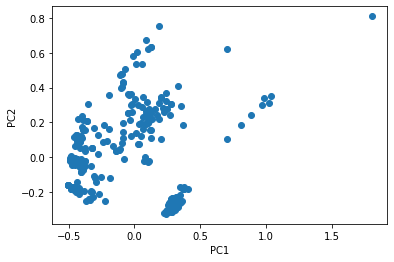

In [37]:
fig, ax = plt.subplots()
plt.scatter(transformada[:,0],transformada[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

# KMeans

In [38]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

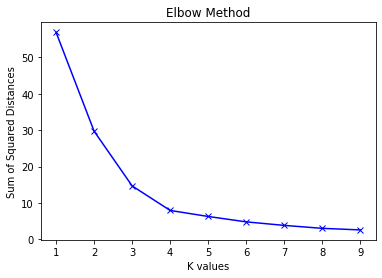

In [39]:
# Rango de valores para numero de cluster
K = range(1,10)
sum_of_squared_distances = []

# Suma de las distancias al cuadrado
for k in K:
    model = KMeans(n_clusters=k).fit(transformada)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=3)

In [41]:
kmeans.fit(transformada)

KMeans(n_clusters=3)

In [42]:
y_kmeans = kmeans.predict(transformada)

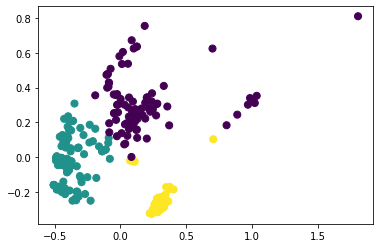

In [44]:
plt.scatter(transformada[:,0],transformada[:,1], c=y_kmeans, s=50, cmap='viridis')

In [45]:
y_kmeans.shape

(300,)

In [46]:
df2["grupo"] = y_kmeans

In [47]:
df2

,Molecular_weight,LogP,Fraction_of_rotatable_bonds,MolarRefractivity,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,grupo
0,0.001257,0.067353,0.192593,0.005661,0.314170,0.007595,0.928567,0.003714,0.000000,0.003008,1
1,0.054104,0.077875,0.288889,0.039462,0.597417,0.075769,0.924870,0.029472,0.059687,0.068630,1
2,0.179681,0.000000,0.173333,0.064861,0.247675,0.007542,0.148740,0.440096,0.078095,0.064811,1
3,0.020156,0.071095,0.173333,0.028754,0.247675,0.008746,0.927646,0.004224,0.019858,0.009717,1
4,0.044556,0.079939,0.173333,0.015841,0.314170,0.027211,0.928706,0.010987,0.019858,0.009717,1
...,...,...,...,...,...,...,...,...,...,...,...
295,0.344838,0.247667,0.577778,0.268057,0.330332,0.307191,0.997479,0.101562,0.364502,0.408083,0
296,0.294474,0.182206,0.385185,0.221792,0.492694,0.146111,0.893213,0.060499,0.304831,0.270896,0
297,0.362471,0.245897,0.615054,0.287622,0.411513,0.308102,0.892901,0.123125,0.384416,0.439512,0
298,0.381260,0.203568,0.595833,0.261192,0.707675,0.290866,0.893918,0.116243,0.404341,0.443202,0


In [ ]:
#df2.to_csv("3_clust_smi_pubchem.csv")